<style>
 
{
  margin: 0;
  padding: 0;
  box-sizing: border-box;}

  body {
  margin-left: -24px;
  margin-top: 0;
  font-family: "Arial", sans-serif;
  width: 100%;
  height: 100vh;
  display: flex;
  flex-direction: column;
  justify-content: space-between;
  box-sizing: border-box;
}
  .title {
    text-align: center;
    font-size: 36px; 
    font-weight: bold;
    align-items: center;
    margin-top: 50px; 
  }
  .subtitle {
    text-align: center;
    font-size: 28px; 
    font-weight: bold;
    align-items: center;
    margin-bottom: 30px;
  }
  .logo {
    text-align: center;
    margin: 50px 0; 
    align-items: center;
  }
  .project-title {
    text-align: center;
    font-size: 28px; 
    font-weight: bold;
    align-items: center;
    margin: 40px 0; 
  }
  .authors {
    font-size: 20px; 
    text-align: center;
    margin-bottom: 50px;
    align-items: center;
  }
</style>

<div class="title">POLITECHNIKA LUBELSKA</div>
<div class="subtitle">WYDZIAŁ MATEMATYKI I INFORMATYKI TECHNICZNEJ</div>
<div class="subtitle">Kierunek: Inżynieria i Analiza Danych</div>

<div class="logo">
  <img src="logo/logopl.png" alt="Logo Politechniki Lubelskiej" width="300"> <!-- Większe logo -->
</div>

<div class="project-title">Projekt Zaliczeniowy z Zakresu Metod Walidacji</div>
<div class="subtitle"><em>Praca wykonana przez:</em></div>
<div class="authors">
  <strong>Andrii Zapukhlyi, Nr albumu: s100935</strong> <br>
  <strong>Mateusz Drozd, Nr albumu: s100966</strong> <br>
</div>

## Zbiór Danych
Zbiór danych „Air Quality UCI” zawiera 9 358 instancji godzinnych uśrednionych odpowiedzi pięciu czujników półprzewodnikowych (metal-oxide) zainstalowanych w urządzeniu wieloczujnikowym do monitoringu jakości powietrza w terenie, wraz z jednoczesnymi pomiarami referencyjnymi stężeń zanieczyszczeń przez certyfikowany analizator.  
Dane obejmują okres od marca 2004 do lutego 2005 (13 miesięcy).  

| Nr | Nazwa zmiennej               | Opis                                                                                   |
| -- | ---------------------------- | -------------------------------------------------------------------------------------- |
| 0  | **Date**                     | Data pomiaru w formacie DD/MM/YYYY                                                     |
| 1  | **Time**                     | Godzina pomiaru w formacie HH.MM.SS                                                    |
| 2  | **True CO (mg/m³)**          | Rzeczywiste stężenie tlenku węgla (CO) zmierzone przez analizator referencyjny         |
| 3  | **PT08.S1 (tin oxide)**      | Odpowiedź sensora tlenku cyny (nominalnie celowanego w CO)                             |
| 4  | **True NMHC (µg/m³)**        | Rzeczywiste stężenie węglowodorów niemetanicznych (NMHC) przez analizator referencyjny |
| 5  | **True Benzene (µg/m³)**     | Rzeczywiste stężenie benzenu przez analizator referencyjny                             |
| 6  | **PT08.S2 (titania)**        | Odpowiedź sensora tlenku tytanu (nominalnie celowanego w NMHC)                         |
| 7  | **True NOx (ppb)**           | Rzeczywiste stężenie tlenków azotu (NOx) w ppb przez analizator referencyjny           |
| 8  | **PT08.S3 (tungsten oxide)** | Odpowiedź sensora tlenku wolframu (nominalnie celowanego w NOx)                        |
| 9  | **True NO₂ (µg/m³)**         | Rzeczywiste stężenie dwutlenku azotu (NO₂) przez analizator referencyjny               |
| 10 | **PT08.S4 (tungsten oxide)** | Odpowiedź sensora tlenku wolframu (nominalnie celowanego w NO₂)                        |
| 11 | **PT08.S5 (indium oxide)**   | Odpowiedź sensora tlenku indu (nominalnie celowanego w O₃)                             |
| 12 | **Temperature (°C)**         | Temperatura powietrza w stopniach Celsjusza                                            |
| 13 | **Relative Humidity (%)**    | Wilgotność względna powietrza w procentach                                             |
| 14 | **Absolute Humidity**        | Wilgotność bezwzględna (AH)                                                            |


### Charakterystyka danych
- **Typ:** Wielozmiennowy, szereg czasowy.  
- **Zadanie:** Regresja.  
- **Typ cech:** wartości rzeczywiste (float).  
- **Liczba instancji:** 9 358.  
- **Liczba cech:** 15.  

### Obsługa braków
Brakujące wartości oznaczono wartością `-200` w komórkach sensorów i analizatorów – wymagana wstępna obróbka zmiennych.


## Cel projektu

Celem projektu jest zbudowanie modelu regresyjnego, który na podstawie dostępnych pomiarów (wszystkich kolumn z wyjątkiem `Date` i `Time`) będzie w stanie jak najdokładniej przewidzieć godzinową wartość stężenia benzenu (`C6H6(GT)`). W tym celu:

**wszystkie zmienne użyte do przewidywania (`C6H6(GT)`):**  
   - Odpowiedzi pięciu sensorów półprzewodnikowych (`PT08.S1(CO)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)`, `PT08.S4(NO2)`, `PT08.S5(O3)`)  
   - Pomiary referencyjne innych gazów (`CO(GT)`, `NMHC(GT)`, `NOx(GT)`, `NO2(GT)`)  
   - Warunki meteorologiczne (`T`, `RH`, `AH`)  



In [2]:
import pandas as pd

df = pd.read_csv(
    'data\AirQualityUCI.csv',
    sep=';',
    decimal=',',
)
df.head().iloc[:,11:17]


,PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,972.0,13.3,47.7,0.7255,NaN,NaN
2,1074.0,11.9,54.0,0.7502,NaN,NaN
3,1203.0,11.0,60.0,0.7867,NaN,NaN
4,1110.0,11.2,59.6,0.7888,NaN,NaN


Ponieważ kolumny `"Unnamed: 15"` i `"Unnamed: 16"` zawierają wyłącznie brakujące wartości (–200 lub NaN) oraz  ze względu na nasz cel projektu nie potrzebujemy pól daty i czasu (`"Date"`, `"Time"`), usuwamy je przed dalszą analizą.

In [3]:
import numpy as np
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16", "Date", "Time"])
df.replace(-200.0, np.nan, inplace=True)
df = df[:-114]

W ramach oczyszczania danych usunięto ostatnie 144 wiersze, które nie zawierały żadnych wartości (były w całości puste). Dzięki temu otrzymaliśmy spójniejszy zbiór, wolny od „pustych” rekordów, co ułatwia dalsze analizy statystyczne, wizualizacje oraz modelowanie.

In [ ]:
df = df.fillna(df.median(numeric_only=True))

In [4]:
print("Podstawowe informacje o zbiorze danych:")
print(df.info())

Podstawowe informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB
None


In [5]:
print("Ilość brakujących wartości w zbiorze: ")
print(df.isnull().sum())

Ilość brakujących wartości w zbiorze: 
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [8]:
df.shape

(9357, 13)

In [11]:
import dtale as dt

In [12]:
dtale = dt.show(df)


In [13]:
dtale

# Statystyki opisowe

# PT08.S3(NOx)

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [15]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr = df['PT08.S3(NOx)']
print('Wartość średnia:       %.4f' % arr.mean())
print('Wartość maksymalna:    %.4f' % arr.max())
print('Wartość minimalna:     %.4f' % arr.min())
print('Odchylenie standardowe: %.4f' % arr.std())
print('Wariancja:             %.4f' % arr.var())
print('Skośność:              %.4f' % st.skew(arr))
print('Kurtoza:               %.3f' % st.kurtosis(arr))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr, 0.75))

Wartość średnia:       835.4936
Wartość maksymalna:    2683.0000
Wartość minimalna:     322.0000
Odchylenie standardowe: 256.8173
Wariancja:             65955.1359
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


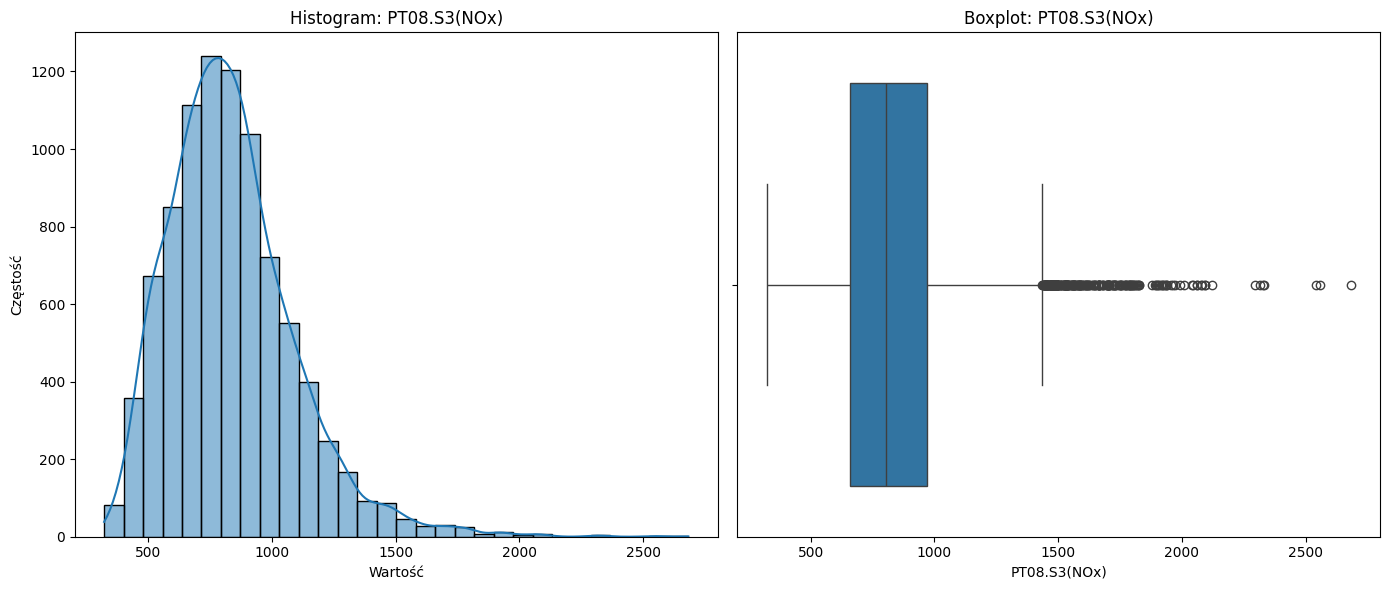

In [16]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr, kde=True, bins=30)
plt.title("Histogram: PT08.S3(NOx)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr)
plt.title("Boxplot: PT08.S3(NOx)")
plt.xlabel("PT08.S3(NOx)")

plt.tight_layout()
plt.show()

### Histogram

* **Kształt rozkładu:** wyraźny szczyt (moda) w okolicach 800–1 000, a dalej gwałtowny spadek częstości — większość odczytów mieści się między \~500 a \~1 200.
* **Skośność:** rozkład przesunięty w prawo (pojedyncze sporadyczne, wysokie odczyty NOx powodują długi ogon).
* **Gęstość:** dolne wartości (< 500) i bardzo wysokie (> 1 500) zdarzają się rzadko.

### Boxplot

* **Mediana (linia wewnątrz pudełka):** wypada około **800**, co oznacza, że połowa wszystkich odczytów jest mniejsza niż ta wartość.
* **Wartości w przedziale między 25% (650) a 75% (970)** stanowią większość danych (IQR – interquartile range).  
* **Wartości odstające (outliers):** liczne punkty poza wąsami po prawej stronie – świadczą o sporadycznych skokowych wzrostach odczytu NOx, które mogą być spowodowane np. nagłą zmianą warunków atmosferycznych.


# NO2(GT)

In [17]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['NO2(GT)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       113.0913
Wartość maksymalna:    340.0000
Wartość minimalna:     2.0000
Odchylenie standardowe: 48.3701
Wariancja:             2339.6673
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


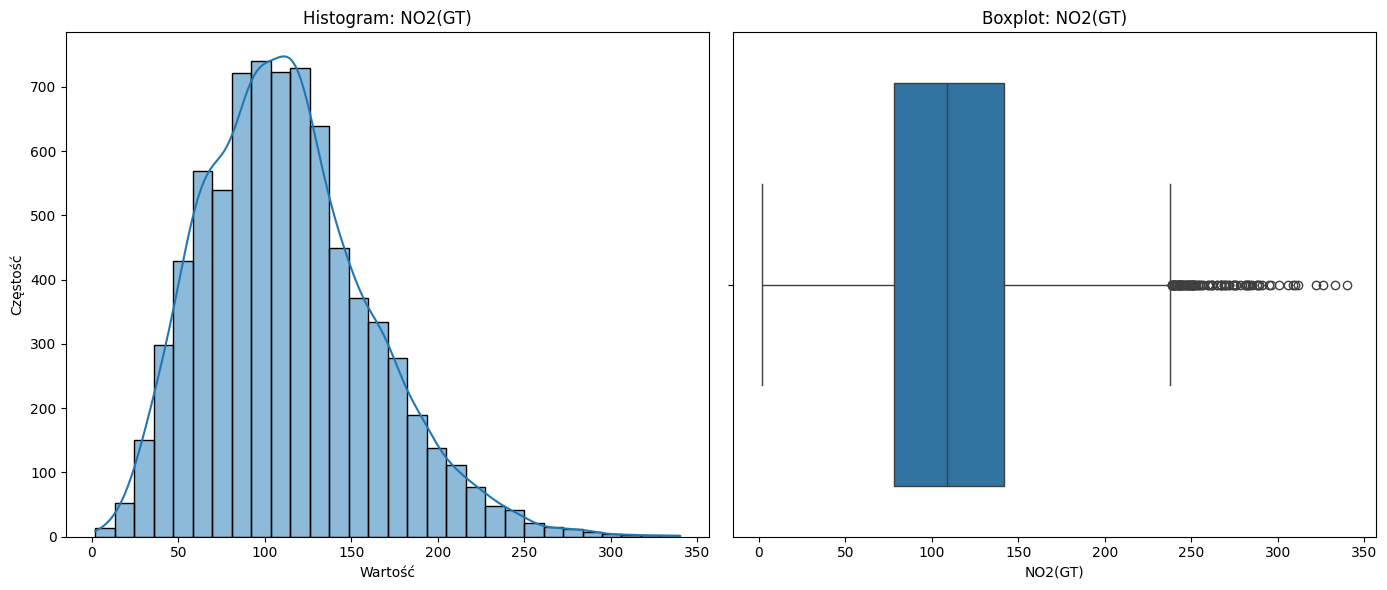

In [18]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NO2(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NO2(GT)")
plt.xlabel("NO2(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NO2(GT)**

### Histogram: NO2(GT)
- **Kształt rozkładu**  
  Rozkład jest lekko prawoskośny, z większością obserwacji skupionych pomiędzy ~80 a ~160.  
- **Modalna wartość**  
  Najwięcej godzinnych odczytów wypada około 100–120.  
- **Ogon rozkładu**  
  Pojawiają się sporadyczne, wyższe wartości powyżej 200, które nadają rozkładowi długi prawy ogon.  
- **Gęstość i rozrzut**  
  Dolne wartości (< 50 ) oraz bardzo wysokie (> 250) są rzadkie.

### Boxplot: NO2(GT)
* **Mediana** wynosi około 115, co oznacza, że połowa pomiarów ma stężenie benzenu poniżej tej wartości.  
* **Wartości w przedziale między 25% (80) a 75% (145)** stanowią większość danych (IQR – interquartile range).    
* **Wartości odstające** liczne punkty powyżej górnego wąsa świadczą o kilkunastu skokowych wzrostach stężenia NO₂.



# C6H6(GT)

In [19]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr2 = df['C6H6(GT)']
print('Wartość średnia:       %.4f' % arr2.mean())
print('Wartość maksymalna:    %.4f' % arr2.max())
print('Wartość minimalna:     %.4f' % arr2.min())
print('Odchylenie standardowe: %.4f' % arr2.std())
print('Wariancja:             %.4f' % arr2.var())
print('Skośność:              %.4f' % st.skew(arr2))
print('Kurtoza:               %.3f' % st.kurtosis(arr2))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr2, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr2, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr2, 0.75))


Wartość średnia:       10.0831
Wartość maksymalna:    63.7000
Wartość minimalna:     0.1000
Odchylenie standardowe: 7.4498
Wariancja:             55.4998
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


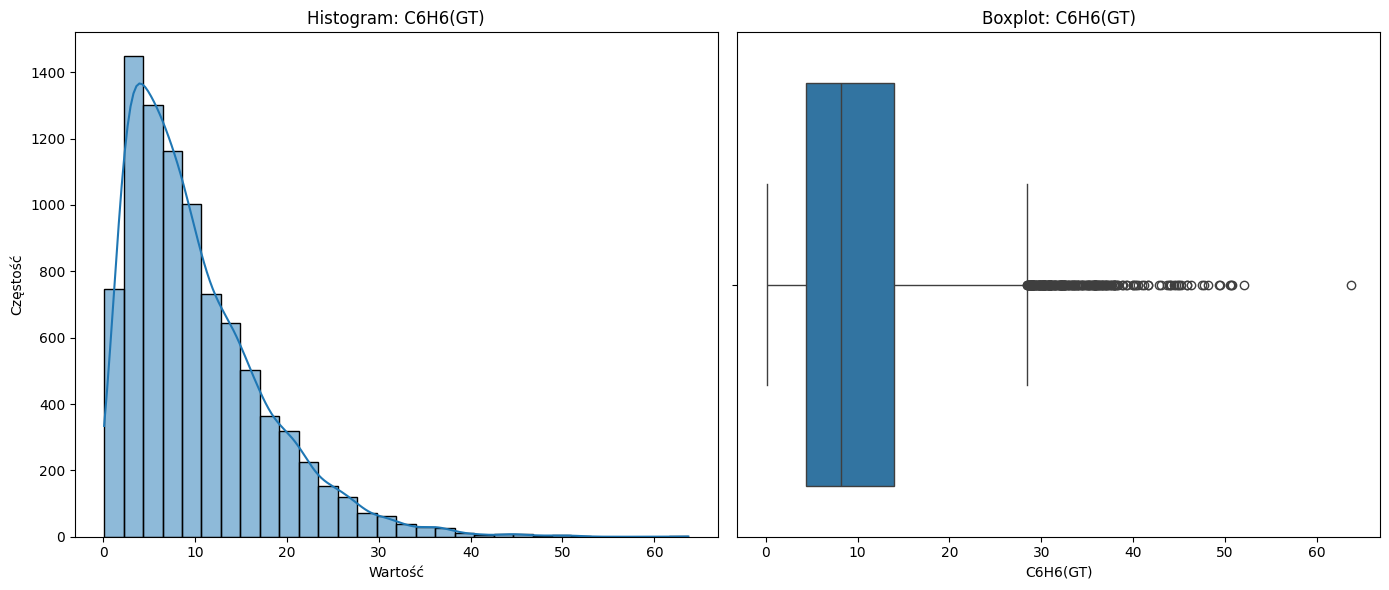

In [20]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr2, kde=True, bins=30)
plt.title("Histogram: C6H6(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr2)
plt.title("Boxplot: C6H6(GT)")
plt.xlabel("C6H6(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **C6H6(GT)**

### Histogram: C6H6(GT)
- **Kształt rozkładu**  
  Wyraźnie prawoskośny rozkład – większość wartości skupia się przy niskich stężeniach benzenu, natomiast sporadyczne obserwacje o wysokich wartościach tworzą długi prawy ogon.
- **Modalna wartość**  
  Najwięcej odczytów wypada w okolicach 5–10.
- **Ogon rozkładu**  
  Stężenia powyżej ~20  są rzadkie, ale sięgają nawet ponad 60.
- **Gęstość i rozrzut**  
  Bardzo niskie wartości (< 2) oraz bardzo wysokie (> 30) zdarzają się rzadko.

### Boxplot: C6H6(GT)
* **Mediana** wynosi w około 8, co oznacza, że połowa pomiarów ma stężenie benzenu poniżej tej wartości.
* **Wartości w przedziale między 25% (5) a 75% (15)** stanowią większość danych (IQR – interquartile range).
* **Wartości odstające**  Liczne punkty powyżej górnego wąsa (20–60) wskazują na sporadyczne epizody podwyższonego stężenia benzenu, które mogą wynikać z lokalnych zdarzeń (np. wzmożony ruch samochodowy, prace remontowe, itp.).


# CO(GT)

In [24]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['CO(GT)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       2.1527
Wartość maksymalna:    11.9000
Wartość minimalna:     0.1000
Odchylenie standardowe: 1.4533
Wariancja:             2.1119
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


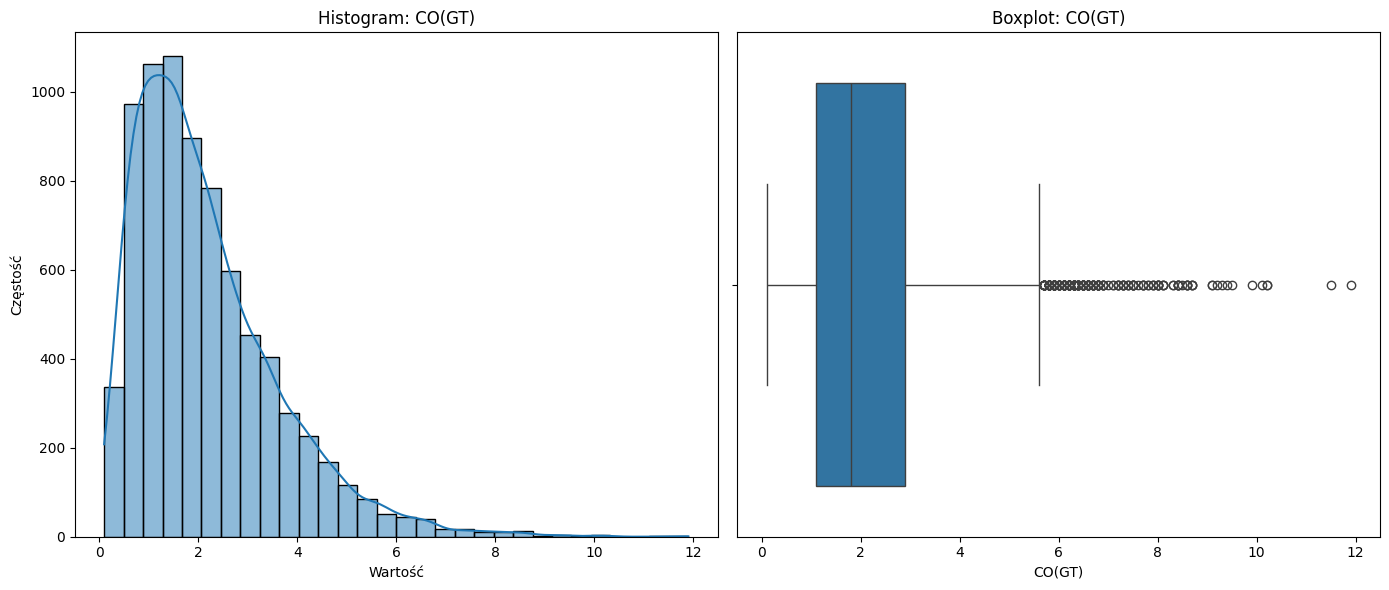

In [26]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: CO(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: CO(GT)")
plt.xlabel("CO(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **CO(GT)**

### Histogram: CO(GT)  
- **Kształt rozkładu**  
  Silnie **prawoskośny rozkład** – ponad 90% danych skupia się w przedziale **0–4**, z częstotliwością sięgającą **1000** dla najniższych wartości (0–2).    
  **Ogon rozkładu**: Długi, rozciągający się do **12**, ale wartości powyżej **6** występują rzadko (częstotliwość spada do 200–400).  
- **Dominujący zakres**  
  Wartości **0–2** dominują, co sugeruje, że większość pomiarów rejestruje **bardzo niskie stężenia CO**.  
- **Implikacje**  
  Niskie średnie stężenie CO może wskazywać na ogólnie dobrą jakość powietrza, ale nie eliminuje ryzyka krótkotrwałych skoków.  

### Boxplot: CO(GT)  
- **Mediana**  
  Wynosi ok. **2** – połowa pomiarów nie przekracza tego poziomu.  
- **Rozstęp międzykwartylowy (IQR)**  
  Przedział **25–75%** prawdopodobnie obejmuje wartości **1–3**, co potwierdza koncentrację danych przy dolnych wartościach.  
- **Wartości odstające**  
  Punkty powyżej **6–12** wskazują na **incydentalne skoki stężenia CO**. Mogą wynikać np. z **Błędów pomiarowych** (wymagają weryfikacji). 


# NMHC(GT)

In [29]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['NMHC(GT)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       218.8118
Wartość maksymalna:    1189.0000
Wartość minimalna:     7.0000
Odchylenie standardowe: 204.4599
Wariancja:             41803.8594
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


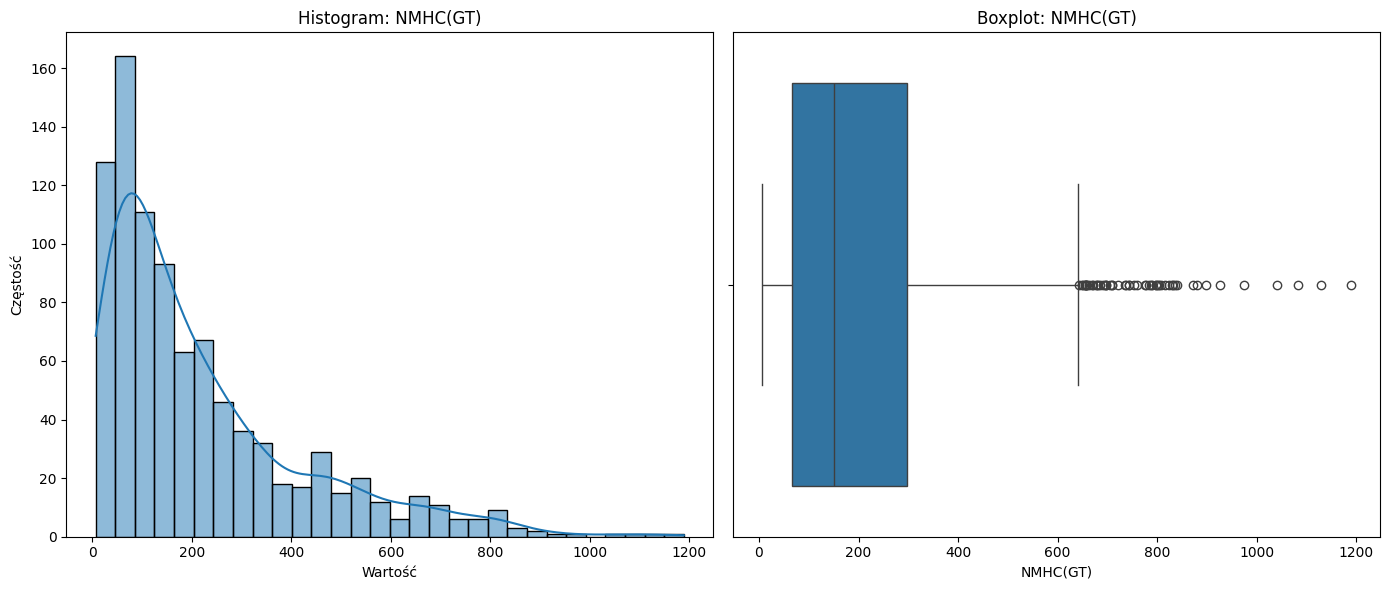

In [30]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NMHC(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NMHC(GT)")
plt.xlabel("NMHC(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NMHC(GT)** (węglowodory niemetanowe)

### Histogram: NMHC(GT)  
- **Kształt rozkładu**:  
  - **Prawoskośność** – większość danych skupia się w niższych zakresach (200–600), z długim ogonem sięgającym **1200**.  
  - **Maksymalna częstotliwość**: Wartości w przedziale **0–100** osiągają najwyższą częstotliwość, co wskazuje na dominację umiarkowanych stężeń.  
  - **Rzadkie wysokie wartości**: Powyżej **800** częstotliwość gwałtownie spada, ale ekstremalne pomiary (do **1200**) sugerują incydentalne emisje.    

### Boxplot: NMHC(GT)  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi ok.**~600** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **100–300** obejmuje 50% danych, co wskazuje na umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **1000** (sięgające **1200**) – mogą być związane z awariami przemysłowymi, intensywnym ruchem drogowym lub spalaniem odpadów.  
- **Implikacje środowiskowe**:  
  - NMHC są prekursorami ozonu przygruntowego – nawet średnie stężenia (100–300) wymagają monitorowania.  
  - Skrajne wartości (>1000) mogą wskazywać na lokalne źródła zanieczyszczeń, np. rafinerie lub magazyny paliw.  

# PT08.S2(NMHC)

In [37]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['PT08.S2(NMHC)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       939.1534
Wartość maksymalna:    2214.0000
Wartość minimalna:     383.0000
Odchylenie standardowe: 266.8314
Wariancja:             71199.0113
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


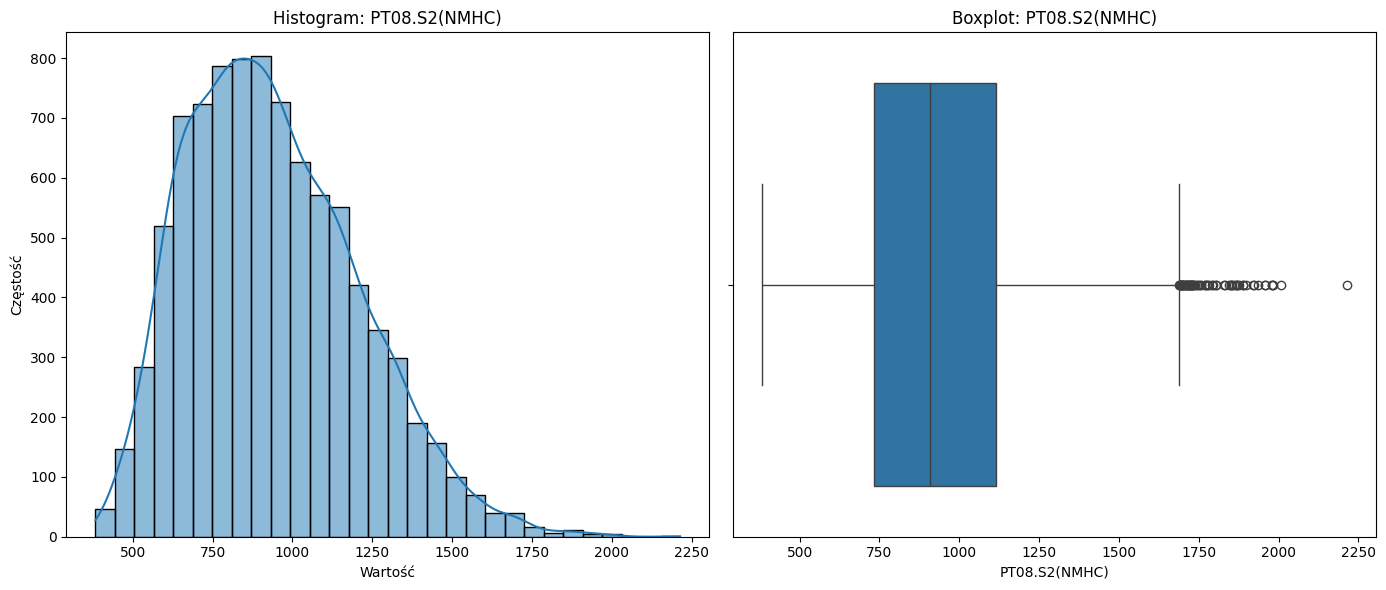

In [38]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S2(NMHC)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S2(NMHC)")
plt.xlabel("PT08.S2(NMHC)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.S2(NMHC)** (prawdopodobnie pomiar czujnika NMHC)

### Histogram: PT08.S2(NMHC)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych skupia się w przedziale **500–1250**, z maksymalną częstotliwością **800** dla wartości ok. **900**.  
  - **Ogon rozkładu**: Długi, rozciągający się do **2250**, ale powyżej **1500** częstotliwość spada do zera.  
- **Dominujący zakres**:  
  - Ponad 70% pomiarów mieści się w przedziale **500–1250**, co sugeruje stabilne warunki pomiarowe dla większości czasu.  
- **Anomalie**:  
  - Brak danych poniżej **500** – może wynikać z zakresu czułości czujnika lub braku emisji w niższych wartościach.  

### Boxplot: PT08.S2(NMHC)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~900** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **750–1150** obejmuje 50% centralnych danych, co wskazuje na umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **1750** (sięgające **2250**) – mogą wynikać z **Chwilowych zakłóceń** (np. błędy czujnika, kurz),  

# PT08.S1(CO)

In [50]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['PT08.S1(CO)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       1099.8332
Wartość maksymalna:    2040.0000
Wartość minimalna:     647.0000
Odchylenie standardowe: 217.0800
Wariancja:             47123.7426
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


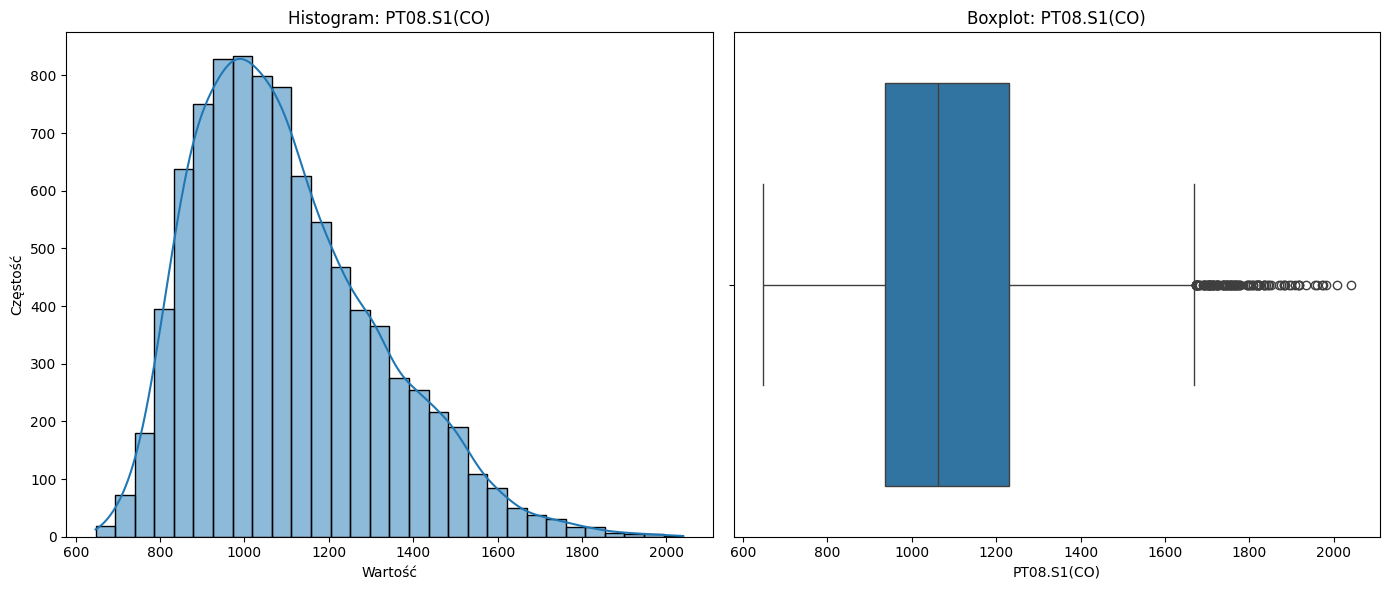

In [51]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S1(CO)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S1(CO)")
plt.xlabel("PT08.S1(CO)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.S1(CO)** (pomiar czujnika CO)

### Histogram: PT08.S1(CO)  
- **Kształt rozkładu**:  
  - **Lewoskośność** – najwyższa częstotliwość (**800**) występuje dla wartości (ok. **1000**), a następnie maleje wraz ze wzrostem stężenia CO.  
  - **Brak danych powyżej 2000** – zakres pomiarowy czujnika lub rzeczywisty brak wyższych stężeń.  
- **Dominujący zakres**:  
  - Ponad 70% danych skupia się w przedziale **600–1200**, co wskazuje na przewagę niskich i umiarkowanych stężeń CO.  
- **Anomalie**:  
  - Etykieta "Crystoid" (prawdopodobnie błąd dla "Częstość") sugeruje problem z formatowaniem osi Y.  

### Boxplot: PT08.S1(CO)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~1050** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **900–1250** obejmuje 50% centralnych danych, co wskazuje na umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **1800–2000** – mogą wynikać z **Krótkotrwałych emisji** (np. korki drogowe, awarie systemów wentylacyjnych),   


# NOx(GT)

In [41]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['NOx(GT)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       246.8967
Wartość maksymalna:    1479.0000
Wartość minimalna:     2.0000
Odchylenie standardowe: 212.9792
Wariancja:             45360.1260
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


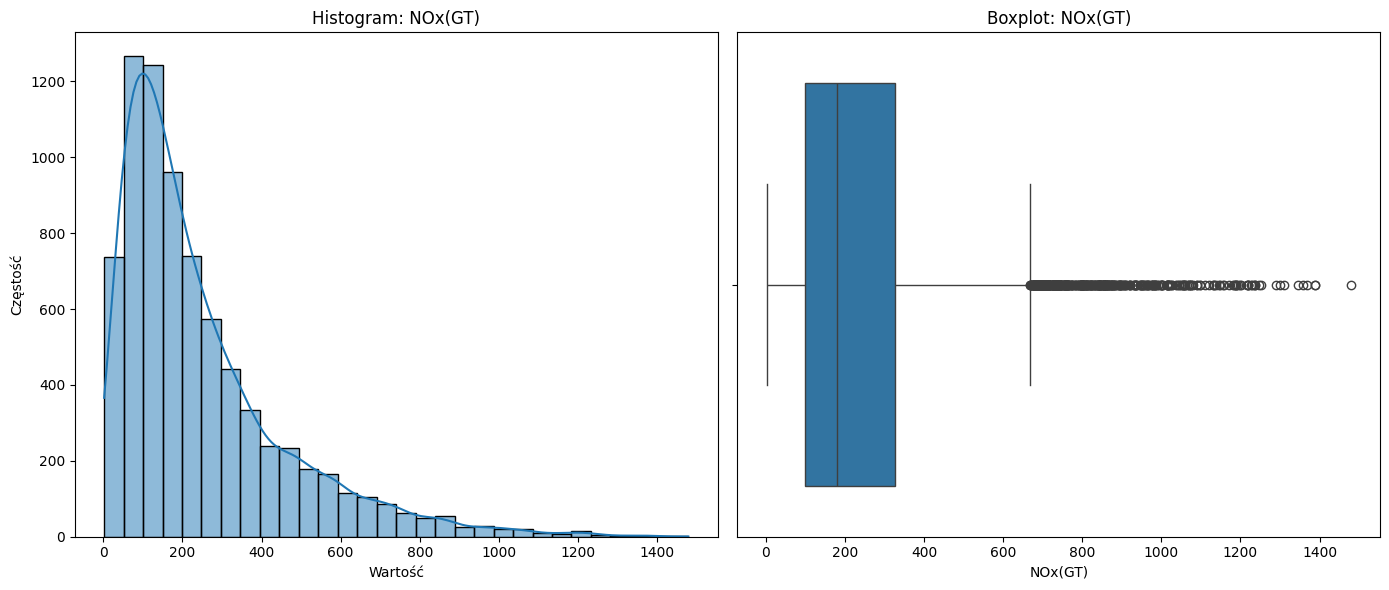

In [42]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NOx(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NOx(GT)")
plt.xlabel("NOx(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NOx(GT)** (tlenki azotu)

### Histogram: NOx(GT)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych koncentruje się w przedziale **0–400**, z maksymalną częstotliwością **1200** dla wartości ok. **200**.  
  - **Ogon rozkładu**: Długi, rozciągający się do **1400**, ale wartości powyżej **800** występują rzadko (częstotliwość spada do 200–400).  
- **Dominujący zakres**:  
  - Ponad **80% pomiarów** mieści się w przedziale **0–600**, co wskazuje na przewagę niskich i umiarkowanych stężeń NOx.  
- **Anomalie**:  
  - Brak danych powyżej **1400** – może wynikać z ograniczeń czujnika lub braku ekstremalnych emisji.  

### Boxplot: NOx(GT)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~180** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **100–300** obejmuje 50% centralnych danych, co sugeruje umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **1000** (sięgające **1400**) – mogą być związane z **Intensywnym ruchem drogowym** (szczególnie w godzinach szczytu),   
- **Implikacje środowiskowe**:  
  - NOx są kluczowe dla powstawania smogu i kwaśnych deszczów – nawet średnie stężenia (100–300) wymagają monitorowania.  

# PT08.S4(NO2)

In [55]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['PT08.S4(NO2)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       1456.2646
Wartość maksymalna:    2775.0000
Wartość minimalna:     551.0000
Odchylenie standardowe: 346.2068
Wariancja:             119859.1439
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


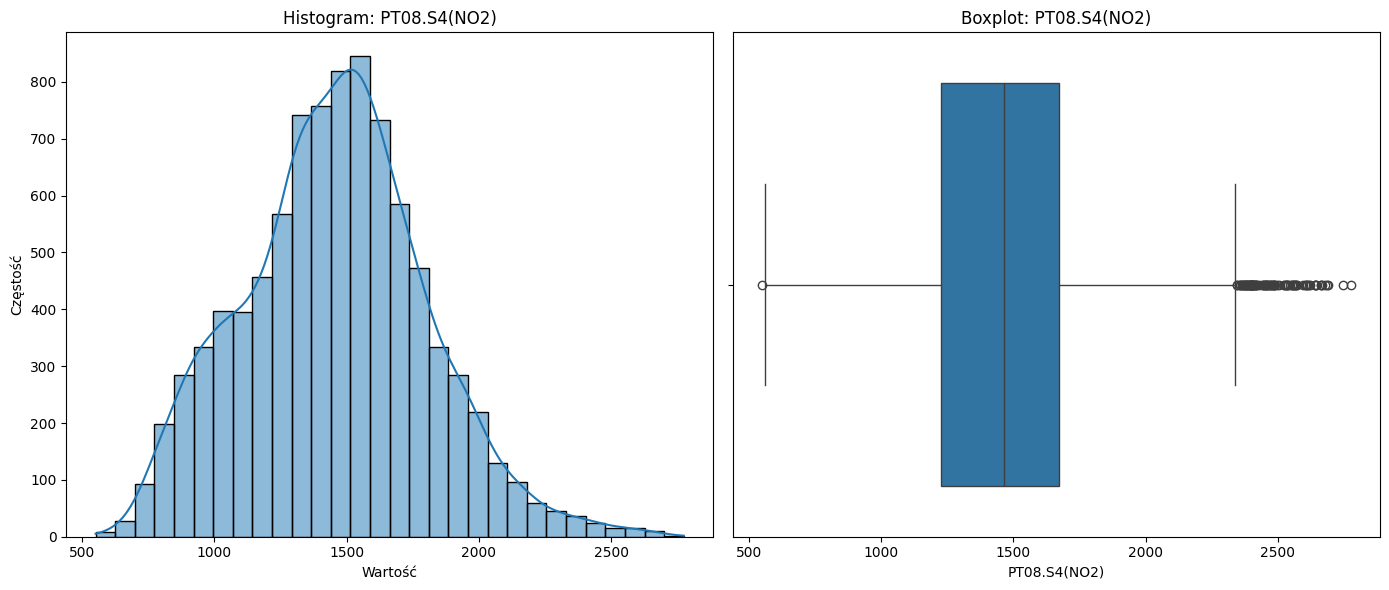

In [56]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S4(NO2)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S4(NO2)")
plt.xlabel("PT08.S4(NO2)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.S4(NO2)** (pomiar czujnika NO2)

### Histogram: PT08.S4(NO2)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – najwyższa częstotliwość (**800**) występuje dla wartości **1250–1750**, po czym gwałtownie spada w kierunku wyższych stężeń.  
  - **Ogon rozkładu**: Cienki, rozciągający się do **2500**, ale wartości powyżej **1500** są rzadkie (częstotliwość spada do 100–200).  
- **Dominujący zakres**:  
  - Ponad **70% danych** skupia się w przedziale **500–1600**, co wskazuje na przewagę **średnich stężeń NO2** w badanym okresie.  
- **Anomalie**:  
  - Brak danych poniżej **500** – może wynikać z dolnego progu czułości czujnika lub braku emisji w niższych zakresach.  

### Boxplot: PT08.S4(NO2)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~1450** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **1250–1650** obejmuje 50% centralnych danych, co sugeruje **znaczną zmienność**.  
  - **Wartości odstające**: Punkty powyżej **2000** (sięgające **2500**) – mogą być związane z **Emisjami przemysłowymi** (np. spalanie paliw stałych),   
- **Implikacje środowiskowe**:  
  - NO2 jest kluczowy dla powstawania **smogu** i negatywnego wpływu na drogi oddechowe – skrajne wartości (>2000) wymagają natychmiastowej interwencji.  

# PT08.S5(O3)

In [57]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['PT08.S5(O3)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       1022.9061
Wartość maksymalna:    2523.0000
Wartość minimalna:     221.0000
Odchylenie standardowe: 398.4843
Wariancja:             158789.7276
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


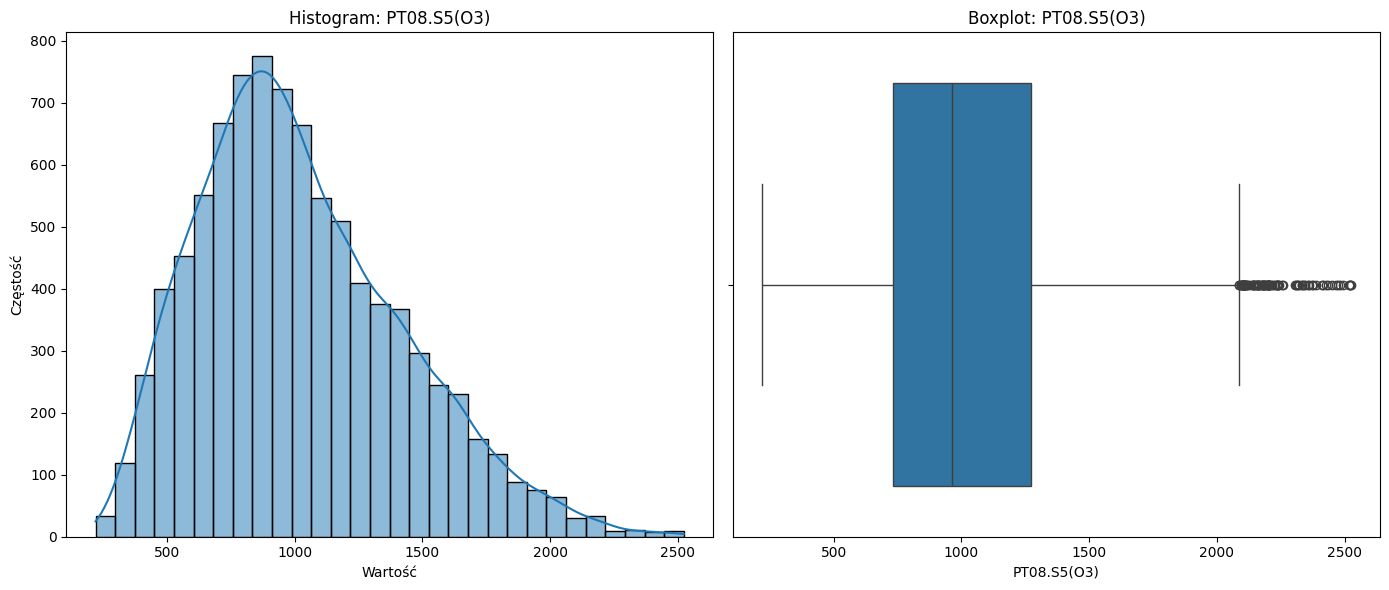

In [58]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S5(O3)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S5(O3)")
plt.xlabel("PT08.S5(O3)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.55(O3)** (pomiar ozonu)

### Histogram: PT08.55(O3)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych skupia się w przedziale **500–1000**, z maksymalną częstotliwością dla wartości ok. **900**.  
  - **Ogon rozkładu**: Długi, rozciągający się do **2500**, ale wartości powyżej **1500** występują rzadko.  
- **Dominujący zakres**:  
  - Ponad **60% pomiarów** mieści się w przedziale **500–1500**, co sugeruje przewagę **nisko-średnich stężeń ozonu**.  
- **Anomalie**:  
  - Brak danych poniżej **350** – może wynikać z dolnego progu czułości czujnika lub rzeczywistego braku emisji.  

### Boxplot: PT08.55(O3)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~1000** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **750–1250** obejmuje 50% danych, co wskazuje na **znaczną zmienność**.  
  - **Wartości odstające**: Punkty powyżej **2000** (sięgające **2500**) – mogą być związane z **Epizodami fotochemicznymi** (np. upalne dni z wysokim nasłonecznieniem),  

- **Implikacje środowiskowe**:  
  - Wysokie stężenia O3 (>2000) są szkodliwe dla zdrowia i ekosystemów – wymagają alertów jakości powietrza.  

# AH

In [63]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['AH']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       1.0255
Wartość maksymalna:    2.2310
Wartość minimalna:     0.1847
Odchylenie standardowe: 0.4038
Wariancja:             0.1631
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


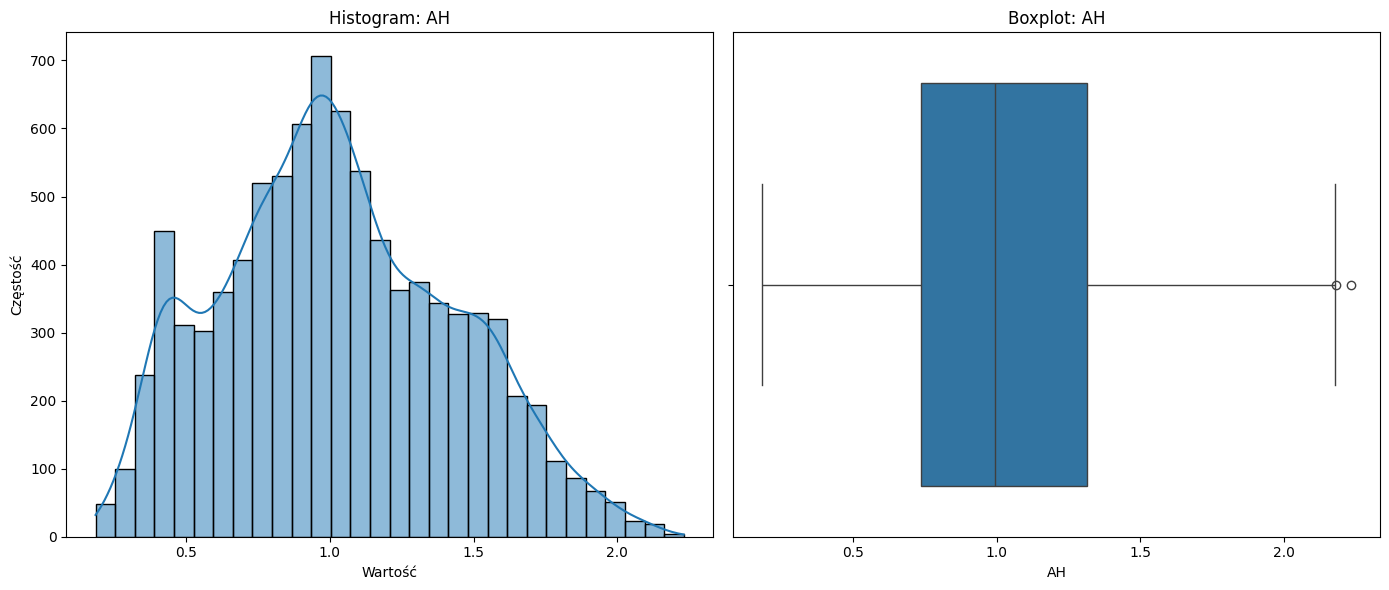

In [64]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: AH")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: AH")
plt.xlabel("AH")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **AH** (wilgotność bezwzględna)

### Histogram: AH  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych skupia się w przedziale **0.75–1.25**, z maksymalną częstotliwością **700** dla wartości **1.0**.  
  - **Ogon rozkładu**: Krótki, rozciągający się do **2.0**, ale wartości powyżej **1.5** występują bardzo rzadko (częstotliwość spada do 0 przy **2.0**).  
- **Dominujący zakres**:  
  - Ponad **90% pomiarów** mieści się w przedziale **0.5–2.0**, co wskazuje na przewagę **niskiej i umiarkowanej wilgotności**.  
- **Anomalie**:  
  - Brak danych poniżej **0.2** – może wynikać z warunków środowiskowych lub ograniczeń czujnika.  

### Boxplot: AH  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~1.0** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **0.75–1.3** obejmuje 50% danych, co potwierdza koncentrację pomiarów w dolnych zakresach.  
  - **Wartości odstające**: Brak wyraźnych outlierów – wszystkie dane mieszczą się w zakresie **0.5–2.0**.  
- **Implikacje**:  
  - Niska wilgotność bezwzględna dominuje w danych, co może wynikać z suchych warunków pomiarowych lub sezonowości (np. pomiary zimą).  

# T

In [59]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['T']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       18.3178
Wartość maksymalna:    44.6000
Wartość minimalna:     -1.9000
Odchylenie standardowe: 8.8321
Wariancja:             78.0063
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


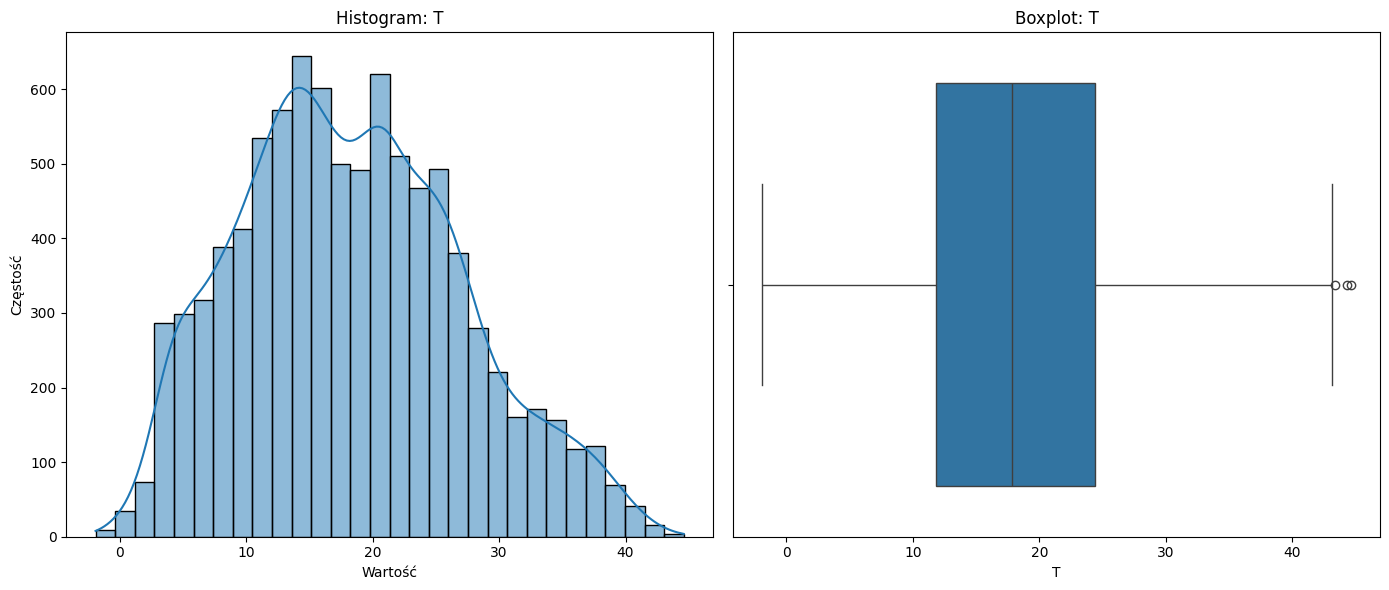

In [60]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: T")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: T")
plt.xlabel("T")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **T** (temperatura)

### Histogram: T  
- **Kształt rozkładu**:  
  - **Prawoskośność** – większość danych skupia się w przedziale **0–30**, z maksymalną częstotliwością **600** dla najniższych wartości (ok. **10**).  
  - **Ogon rozkładu**: Rozciąga się do **40**, ale wartości powyżej **30** występują rzadko (częstotliwość spada do **100**).  
- **Dominujący zakres**:  
  - Ponad **80% pomiarów** mieści się w przedziale **0–20**, co sugeruje przewagę **nisko-średnich temperatur** w badanym okresie.   

### Boxplot: T  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~18** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **12–25** obejmuje 50% danych, co wskazuje na **umiarkowaną zmienność**.  
  - **Wartości odstające**: Brak wyraźnych outlierów – wszystkie dane mieszczą się w zakresie **0–40**.  
- **Implikacje**:  
  - Dominacja niskich temperatur może wynikać z sezonowości (np. pomiary zimowe) lub lokalnych warunków klimatycznych.  

# RH

In [67]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['RH']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       49.2342
Wartość maksymalna:    88.7000
Wartość minimalna:     9.2000
Odchylenie standardowe: 17.3169
Wariancja:             299.8748
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


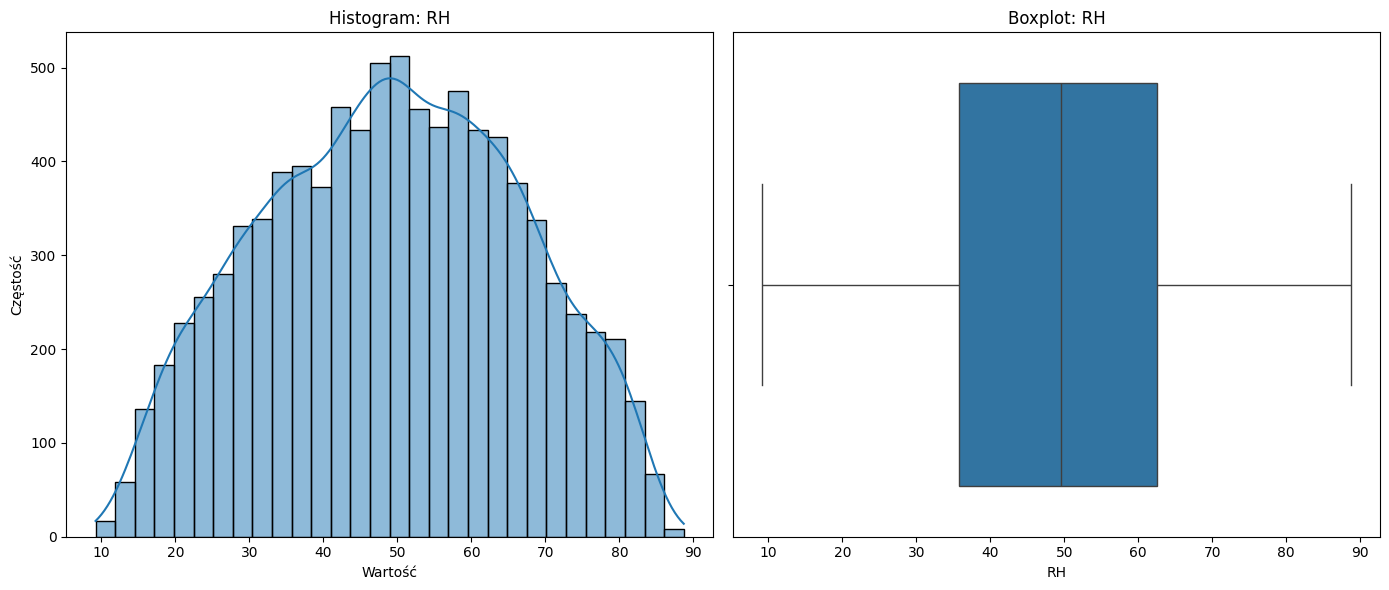

In [68]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: RH")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: RH")
plt.xlabel("RH")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **RH** (wilgotność względna)

### Histogram: RH  
- **Kształt rozkładu**:  
  - **Rozkład prawdopodobnie bimodalny lub równomierny** – dane rozłożone w zakresie **10–90**, bez wyraźnej dominacji jednego przedziału.  
  - **Brak skrajnych wartości** – wszystkie pomiary mieszczą się w zakresie **10–90**, co sugeruje stabilne warunki pomiarowe.  
- **Dominujący zakres**:  
  - Najczęściej występują wartości w okolicy **~50**. 

### Boxplot: RH  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~50** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **35–65** obejmuje 50% danych, co wskazuje na **umiarkowaną zmienność**.  
  - **Wartości odstające**: Brak wyraźnych outlierów – dane skupione w głównym zakresie.  
- **Implikacje**:  
  - Wilgotność względna utrzymuje się w typowym zakresie, co może odpowiadać warunkom mieszanym (np. naprzemienne okresy suche i wilgotne).  

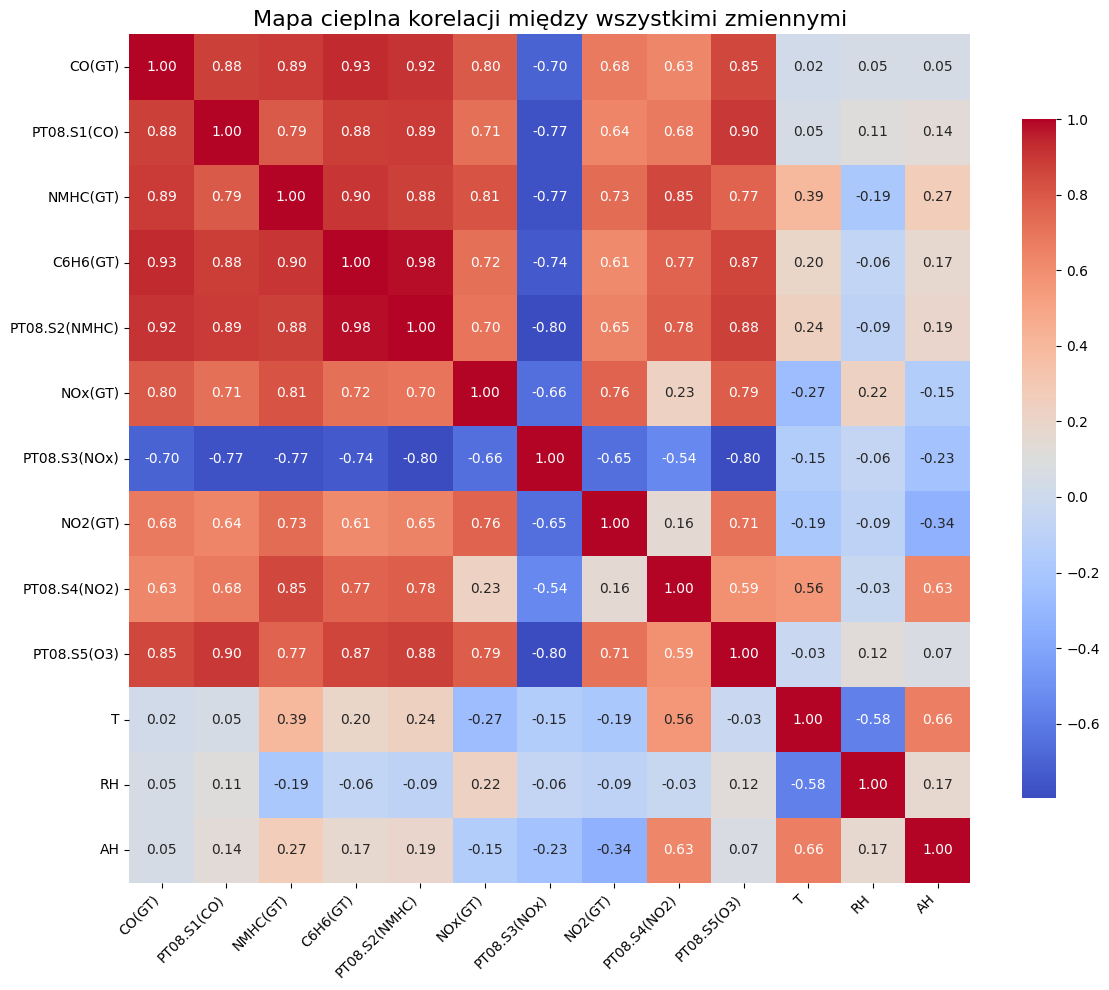

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns

# Obliczenie macierzy korelacji
corr = df.corr()

# Rysowanie heatmapy
plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            annot=True,        # wyświetla wartości korelacji w komórkach
            fmt=".2f",         # format liczb
            cmap="coolwarm",   # paleta kolorów
            cbar_kws={"shrink": .8})  # zmniejszona kolorbar
plt.title("Mapa cieplna korelacji między wszystkimi zmiennymi", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Mapa cieplna (heatmap) przedstawiająca współczynniki korelacji Pearsona pomiędzy wszystkimi zmiennymi w zbiorze danych.

##  Kluczowe obserwacje:

1. **Bardzo silne dodatnie korelacje między zmierzonym stężeniem gazów a czujnikami dedykowanymi tym gazom**

   * CO(GT) silnie koreluje z sygnałem czujnika PT08.S1 (r ≈ 0,88).
   * NMHC(GT) z PT08.S2 (r ≈ 0,89) oraz z PT08.S1 (r ≈ 0,79).
   * NOx(GT) z PT08.S3 (r ≈ 0,79).
   * NO2(GT) z PT08.S4 (r ≈ 0,16) – tu korelacja jest już słabsza, ale nadal dodatnia.
   * O₃ (oznaczone jako PT08.S5) ma wysoką korelację z innymi sensorami np. z PT08.S1 (r ≈ 0,90).

2. **Wysokie wzajemne korelacje między samymi sensorami**
   Czujniki gazów (PT08.S1–PT08.S5) silnie ze sobą powiązane (wartości r w zakresie ok. 0,68–0,90), co sugeruje, że zmiany jednej substancji często towarzyszą zmianom innych.

3. **Ujemne korelacje z temperaturą (T)**

   * Sensor PT08.S3 (NOx) silnie ujemnie koreluje z temperaturą (r ≈ –0,80).
   * Również PT08.S1, PT08.S2, PT08.S5 wykazują ujemne korelacje z T (r około –0,70 do –0,80).
     To może wynikać z sezonowości emisji/rozprzestrzeniania się zanieczyszczeń (niższe temperatury sprzyjają wyższym stężeniom niektórych gazów).

4. **Wilgotność względna (RH) vs czujniki**

   * Przeważnie słabe ujemne korelacje (np. RH vs PT08.S1 to r ≈ 0,11 dodatnie, ale vs PT08.S3 r ≈ –0,06).
   * Wyjątkiem jest silna ujemna korelacja RH z temperaturą (r ≈ –0,58) – co jest naturalne (cieplejsze powietrze może „pomieścić” więcej wilgoci, obniżając względną wilgotność przy wzroście T).

5. **Ciśnienie pary (AH)**

   * Umiarkowanie dodatnio koreluje z temperaturą (r ≈ 0,66), co ma sens fizycznie (wyższa T → większa absolutna wilgotność).
   * Słabe lub umiarkowane korelacje z czujnikami gazów (r w okolicach 0,1–0,3).

---

**Podsumowując:** czujniki chemiczne silnie ze sobą powiązane oraz z mierzonymi stężeniami poszczególnych gazów, natomiast warunki meteorologiczne – zwłaszcza temperatura – mają znaczący wpływ na odczyty czujników (ujemna korelacja). Mniej wyraźny, ale wciąż zauważalny, wpływ ma wilgotność i absolutna wilgotność.


<Figure size 1200x1200 with 0 Axes>

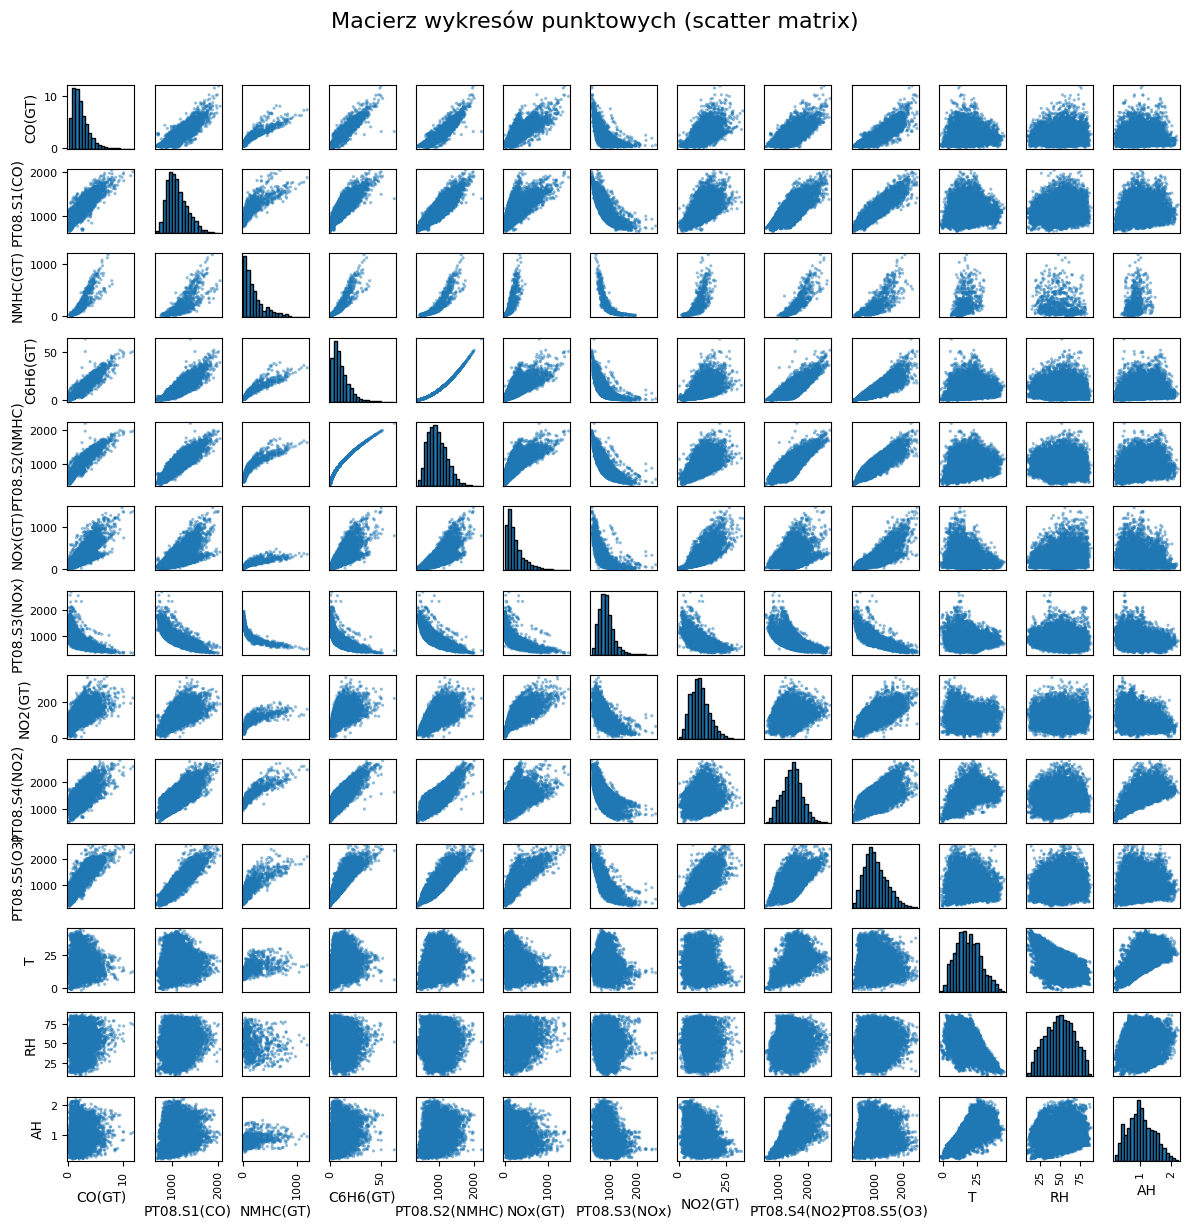

In [71]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Scatter matrix z histogramami na przekątnej
plt.figure(figsize=(12,12))
scatter_matrix(df, 
               alpha=0.5, 
               diagonal='hist',
               figsize=(12,12),
               s=20,            # rozmiar punktów
               hist_kwds={'bins': 20, 'edgecolor':'k'})
plt.suptitle("Macierz wykresów punktowych (scatter matrix)", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


# Macierz rozrzutu (scatter matrix) łączy w sobie w jednym wykresie dwie informacje:

1. **Rozkłady pojedynczych zmiennych** (na przekątnej):

   * **CO(GT), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), PT08.S5(O3), AH** – wyraźnie prawoskośne (długie „ogony” w prawo), co oznacza sporadycznie wysokie wartości.
   * **PT08.S1(CO), PT08.S4(NO2)** – także prawoskośne, ale trochę łagodniejsze.
   * **T, RH** – bardziej symetryczne, „dzwonowe” rozkłady; temperatura mieści się głównie między \~0 °C a 30 °C, wilgotność między \~25 % a 75 %.

2. **Wzajemne zależności zmiennych** (poza przekątną):

   * **Bardzo liniowe relacje**

     * CO(GT) vs PT08.S1(CO) – mocny, wąski „podłużny” obłok punktów, co potwierdza korelację r≈0,88.
     * NMHC(GT) vs PT08.S2(NMHC), NOx(GT) vs PT08.S3(NOx) i wiele podobnych par: czujnik → odpowiadający gaz.
   * **Nieliniowe zależności**

     * Sensory vs temperatura (np. PT08.S3(NOₓ) vs T): wykresy mają kształt hiperboliczny/exponential decay – wraz ze wzrostem T odczyty sensorów gwałtownie spadają, a potem stabilizują się.
     * PT08.S5(O₃) vs AH: kształt lekko zakrzywiony, pokazujący, że przy większej absolutnej wilgotności czujnik O₃ trochę lepiej pracuje.
   * **Słabsze, rozproszone relacje**

     * Wilgotność względna (RH) vs większość czujników i gazów: punkty są szeroko rozrzucone, bez wyraźnego trendu (niskie korelacje).
     * AH vs czujniki – umiarkowane, ale nie tak silne jak dla temperatury.

---

**Wnioski:**

* Większość czujników ściśle reaguje na stężenia konkretnych zanieczyszczeń, co widać po bardzo wąskich, liniowych „obłokach” punktów (wysokie korelacje).
* Temperatura ma silny, ale nieliniowy wpływ na odczyty sensorów (spadek wartości wraz z ociepleniem).
* Wilgotność (różna w sensie względnym i absolutnym) wpływa raczej słabiej, choć AH wykazuje umiarkowaną dodatnią zależność z niektórymi sensorami.
* Wyraźne prawoskośne rozkłady w większości zmiennych sugerują konieczność ewentualnej transformacji (np. logarytmicznej), jeśli chcielibyśmy zastosować modele liniowe.
